# importing all required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# fetching data from csv file with(;) in it

In [2]:
df = pd.read_csv('winequality-white.csv',delimiter=';')

# data file after fetching

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# shape of dataser

In [4]:
print("Shape of the intake dataset is: ")
print(df.shape)

Shape of the intake dataset is: 
(4898, 12)


In [5]:
#harshit gupta

# removing all duplicate values

In [6]:
print(" removing all duplicat value:")
no_duplicate = df.drop_duplicates()
print(no_duplicate)#harshit gupta
print("\n\n----------------------------------------------------------")
print("Shape after rmeoving all the duplicate values is : ")
print(no_duplicate.shape)

 removing all duplicat value:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

# Task 1a (white wine)

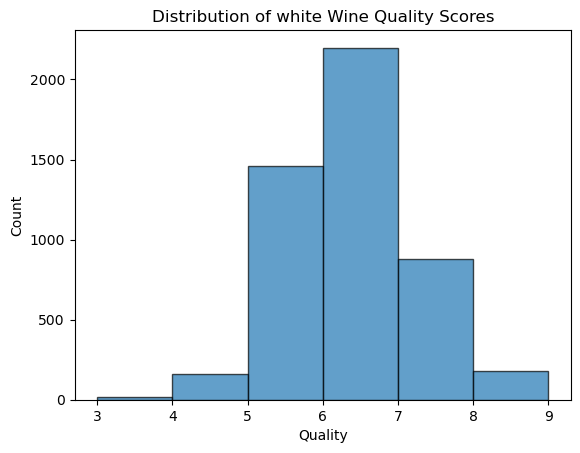

In [7]:

plt.hist(df['quality'], bins=6, edgecolor='black', alpha=0.7)
plt.title('Distribution of white Wine Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


# Task 1b (white wine)

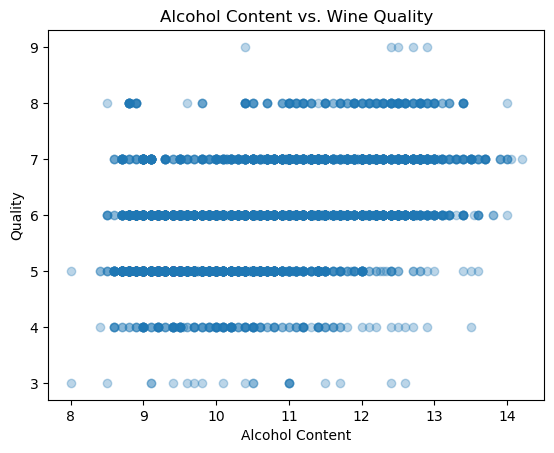

In [8]:

plt.scatter(df['alcohol'],df['quality'], alpha=0.3)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()


# correlation 

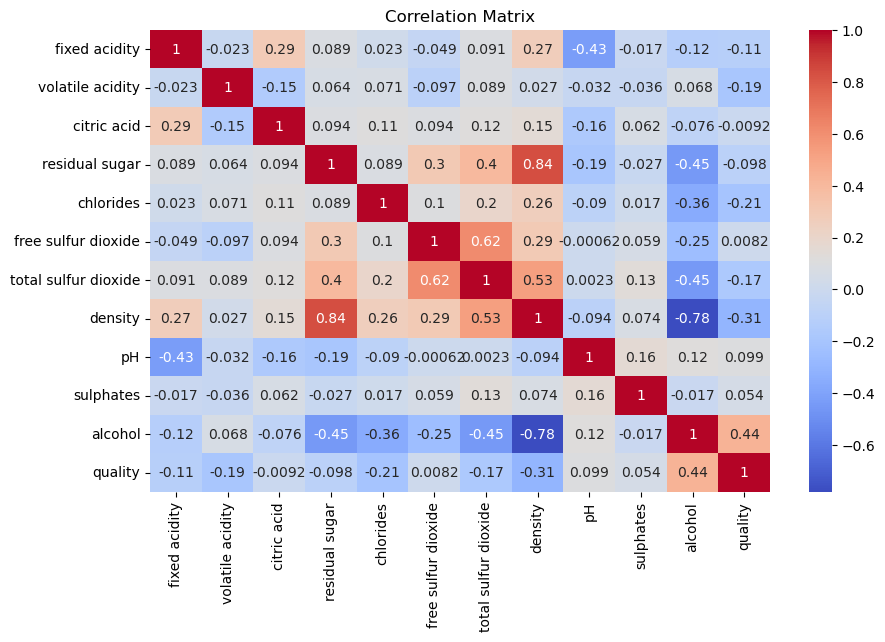

In [9]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# # Task 1c (red wine)

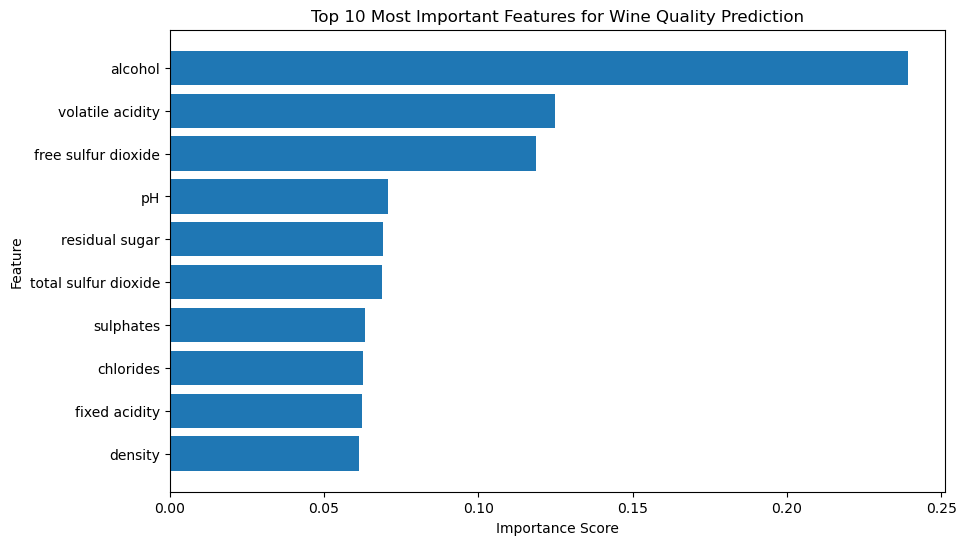

                 Feature  Importance
10               alcohol    0.239100
1       volatile acidity    0.124681
5    free sulfur dioxide    0.118535
8                     pH    0.070574
3         residual sugar    0.068963
6   total sulfur dioxide    0.068830
9              sulphates    0.063197
4              chlorides    0.062779
0          fixed acidity    0.062361
7                density    0.061475


In [10]:

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features for Wine Quality Prediction')
plt.gca().invert_yaxis()  # Reverse  
plt.show()

print(feature_importance_df.head(top_n))
